In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
mypath="C:\\Users\\KBCI\\data\\data_macarons"
mypath2 = "C:\\Users\\KBCI\\data\\data_waffle"
mypath3 = "C:\\Users\\KBCI\\data\\data_apple_pie"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles2 = [f for f in listdir(mypath2) if isfile(join(mypath2, f))]
onlyfiles3 = [f for f in listdir(mypath3) if isfile(join(mypath3, f))]

macaron = numpy.empty(len(onlyfiles), dtype=object)
waffle = numpy.empty(len(onlyfiles2), dtype=object)
apple = numpy.empty(len(onlyfiles3), dtype=object)

r_macaron = numpy.empty(len(onlyfiles), dtype=object)
r_waffle = numpy.empty(len(onlyfiles2), dtype=object)
r_apple = numpy.empty(len(onlyfiles3), dtype=object)

for n in range(0, len(onlyfiles)):
    macaron[n] = cv2.imread(join(mypath, onlyfiles[n]), cv2.IMREAD_COLOR)
for n in range(0, len(onlyfiles2)):
    waffle[n] = cv2.imread(join(mypath2, onlyfiles2[n]), cv2.IMREAD_COLOR)
for n in range(0, len(onlyfiles2)):
    apple[n] = cv2.imread(join(mypath3, onlyfiles3[n]), cv2.IMREAD_COLOR)

for i in range(len(macaron)):
    b, g, r = cv2.split(macaron[i])
    macaron[i] = cv2.merge([r, g, b])
for i in range(len(waffle)):
    b, g, r = cv2.split(waffle[i])
    waffle[i] = cv2.merge([r, g, b])
for i in range(len(apple)):
    b, g, r = cv2.split(apple[i])
    apple[i] = cv2.merge([r, g, b])

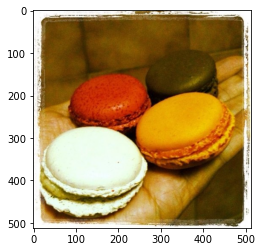

In [3]:
plt.imshow(macaron[0])

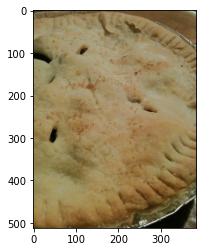

In [4]:
plt.imshow(apple[0])

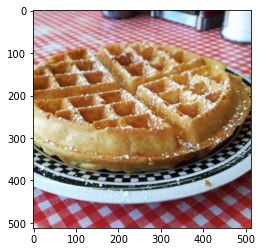

In [5]:
plt.imshow(waffle[0])

In [6]:
waffle[0].shape

(512, 512, 3)

In [7]:
for n in range(0, len(onlyfiles)):
    r_macaron[n] = cv2.resize(macaron[n], dsize=(50, 50), interpolation=cv2.INTER_AREA)
for n in range(0, len(onlyfiles2)):
    r_waffle[n] = cv2.resize(waffle[n], dsize=(50, 50), interpolation=cv2.INTER_AREA)
for n in range(0, len(onlyfiles3)):
    r_apple[n] = cv2.resize(apple[n], dsize=(50, 50), interpolation=cv2.INTER_AREA)

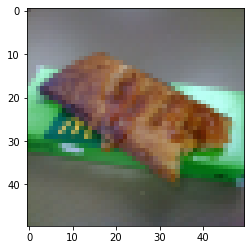

In [8]:
plt.imshow(r_apple[9])

In [37]:
lis_macaron = []
lis_waffle = []
lis_apple = []

y = []
for i in range(len(r_macaron)):
    lis_macaron.append(r_macaron[i].flatten())
    y.append(0)
for i in range(len(r_waffle)):
    lis_waffle.append(r_waffle[i].flatten())
    y.append(1)
# for i in range(len(r_waffle)):
#     lis_apple.append(r_apple[i].flatten())
#     y.append(2)
print(np.array(lis_macaron).shape)    
print(y)


(102, 7500)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [11]:
X = lis_macaron + lis_waffle #+ lis_apple
# nx = r_macaron + r_waffle
# nx = np.array(nx)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [12]:
lin_clf = svm.SVC(kernel='rbf')
lin_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.9386503067484663

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)


lin_clf2 = svm.SVC(C = 0.1, kernel='sigmoid', gamma = 1)
lin_clf2.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred2 = lin_clf2.predict(X_train)
accuracy_score(y_train, y_pred2)

0.5030674846625767

In [14]:
lin_clf3 = svm.SVC(kernel='poly')
lin_clf3.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred3 = lin_clf3.predict(X_train)
accuracy_score(y_train, y_pred3)

1.0

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel ='sigmoid'), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'C': 0.1, 'gamma': 1}
Best Estimators:
 SVC(C=0.1, gamma=1, kernel='sigmoid')


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators =100, random_state = 42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.16028349118362836

In [18]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

In [19]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring ="neg_mean_squared_error", cv =10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [0.43962551 0.47651307 0.42411153 0.41375566 0.40942795 0.41308292
 0.37486664 0.36917137 0.4560222  0.42568327]
평균: 0.42022601378673086
표준편차: 0.03121595060555399


In [20]:
from sklearn.model_selection import GridSearchCV
param_grid= [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
  ]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv =5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 4, 'n_estimators': 30}
RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)


In [22]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4964096684418616 {'max_features': 2, 'n_estimators': 3}
0.46727368529556307 {'max_features': 2, 'n_estimators': 10}
0.4618966170567661 {'max_features': 2, 'n_estimators': 30}
0.5190195691217366 {'max_features': 4, 'n_estimators': 3}
0.46402186142334706 {'max_features': 4, 'n_estimators': 10}
0.4521627787104755 {'max_features': 4, 'n_estimators': 30}
0.5464339551492635 {'max_features': 6, 'n_estimators': 3}
0.47131947281493203 {'max_features': 6, 'n_estimators': 10}
0.46268594405739494 {'max_features': 6, 'n_estimators': 30}
0.5386180721155089 {'max_features': 8, 'n_estimators': 3}
0.47072236557714725 {'max_features': 8, 'n_estimators': 10}
0.4593890504390583 {'max_features': 8, 'n_estimators': 30}
0.5127786259117274 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.47916831356765727 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5407042732502778 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4701446424755736 {'bootstrap': False, 'max_features':

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low =1, high = 200),
    'max_features': randint(low =1, high = 8),
 }

forest_reg = RandomForestRegressor(random_state =42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                               n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FAE6A75648>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FAE6A4C548>},
                   random_state=42, scoring='neg_mean_squared_error')

In [24]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4392441783704404 {'max_features': 7, 'n_estimators': 180}
0.4750624626660619 {'max_features': 5, 'n_estimators': 15}
0.44512677460311756 {'max_features': 3, 'n_estimators': 72}
0.4733351443402311 {'max_features': 5, 'n_estimators': 21}
0.4428971536176086 {'max_features': 7, 'n_estimators': 122}
0.44268552199103073 {'max_features': 3, 'n_estimators': 75}
0.44342859070482854 {'max_features': 3, 'n_estimators': 88}
0.4493468955893182 {'max_features': 5, 'n_estimators': 100}
0.4417518976272078 {'max_features': 3, 'n_estimators': 150}
0.5565978228161124 {'max_features': 5, 'n_estimators': 2}


In [25]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([1.37993450e-04, 0.00000000e+00, 6.84781878e-05, ...,
       0.00000000e+00, 2.29161746e-04, 0.00000000e+00])

In [26]:
print(np.max(feature_importances))
np.argmax(feature_importances)

0.002789836103709182


5360

In [27]:
sv = svm.SVC(kernel = 'rbf', C =1e+20)
result = sv.fit(X_train, y_train)

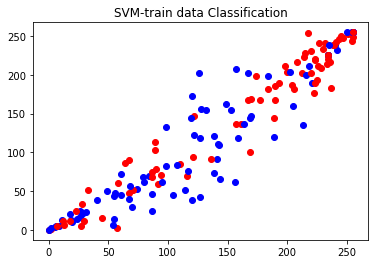

In [46]:
plt.figure(3)
plt.title('SVM-train data Classification')
predict1 = sv.predict(X_train)
predict1 = predict1.astype(float)

for i in range(len(predict1)):
    if predict1[i] == 0:
        plt.scatter(X_train[:,0][i], X_train[:,1][i], color = 'blue')
    if predict1[i] == 1:
        plt.scatter(X_train[:,0][i], X_train[:,1][i], color = 'red')

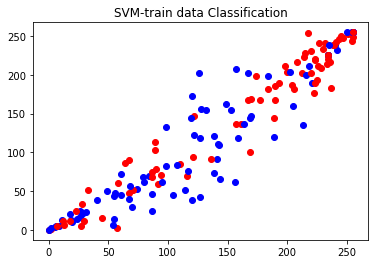

In [67]:
sv = svm.SVC(kernel = 'sigmoid', C =1e+20)
result = sv.fit(X_train, y_train)
plt.figure(3)
plt.title('SVM-train data Classification')
predict1 = sv.predict(X_train)
predict1 = predict1.astype(float)

for i in range(len(predict1)):
    if predict1[i] == 0:
        plt.scatter(X_train[:,0][i], X_train[:,1][i], color = 'blue')
    if predict1[i] == 1:
        plt.scatter(X_train[:,0][i], X_train[:,1][i], color = 'red')